<a href="https://colab.research.google.com/github/stephaniediamond3/DATA71200/blob/main/sept16/data71200sept16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
!pip install mglearn
import mglearn
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.5 MB/s eta 0:00:00


# One-Hot-Encoding from Intro to Machine Learning book

In [ ]:
# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(
    adult_path, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# For illustration purposes, we only select some of the columns
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
# IPython.display allows nice output formatting within the Jupyter notebook
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [ ]:
# Checking string-encoded categorical data

print(data.gender.value_counts())

gender
Male      21790
Female    10771
Name: count, dtype: int64


In [ ]:
# See result of pd.get_dummies

print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [ ]:
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,50,13,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,38,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,53,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,28,40,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Extract NumPy arrays
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# create a DataFrame with an integer feature and a categorical string feature
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
                        'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

# Setting sparse=False means OneHotEncode will return a numpy array, not a sparse matrix
ohe = OneHotEncoder(sparse_output=False)
print(ohe.fit_transform(demo_df))

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


[[1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0.]]


In [ ]:
# same thing but with scikit learn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['age', 'hours-per-week']),
     ("onehot", OneHotEncoder(sparse_output=False), ['workclass', 'education', 'gender', 'occupation'])])

#Binning

In [ ]:
!git clone https://github.com/jcdevaney/data71200f25.git
nbins = 10

from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=nbins, strategy='uniform')


Cloning into 'data71200f25'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 25 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (25/25), 1.11 MiB | 10.12 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
grades_pd = pd.read_csv('/content/data71200f25/sept16/grades.csv', header=None)

grades_pd = grades_pd.transpose()
grades_pd.head()

,0
0,82
1,83
2,92
3,93
4,72


In [ ]:
kb.fit(grades_pd[0].values.reshape(-1, 1))
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([51. , 55.8, 60.6, 65.4, 70.2, 75. , 79.8, 84.6, 89.4, 94.2, 99. ])]


In [ ]:
import matplotlib.pyplot as plt

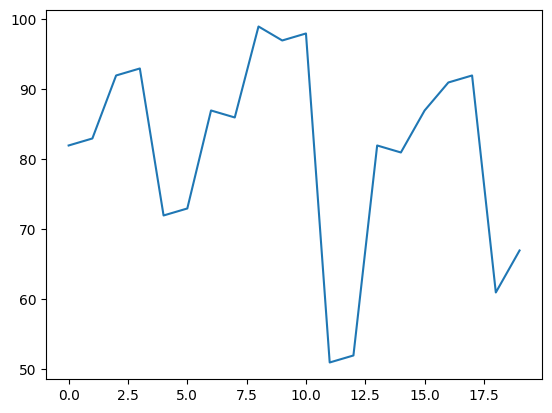

In [ ]:
plt.plot(grades_pd[0].values.reshape(-1, 1))

In [ ]:
print(grades_pd[0].values.reshape(-1, 1))

[[82]
 [83]
 [92]
 [93]
 [72]
 [73]
 [87]
 [86]
 [99]
 [97]
 [98]
 [51]
 [52]
 [82]
 [81]
 [87]
 [91]
 [92]
 [61]
 [67]]


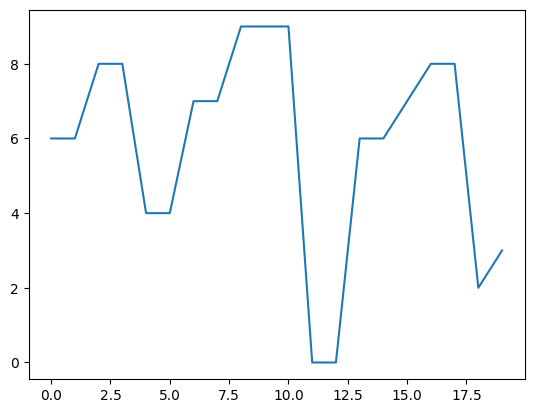

In [ ]:
binned = kb.transform(grades_pd[0].values.reshape(-1, 1))
plt.plot(binned.argmax(1))

In [ ]:
print(binned.argmax(1))

[[6]
 [6]
 [8]
 [8]
 [4]
 [4]
 [7]
 [7]
 [9]
 [9]
 [9]
 [0]
 [0]
 [6]
 [6]
 [7]
 [8]
 [8]
 [2]
 [3]]


#Transformations

(array([2., 0., 1., 1., 2., 0., 4., 3., 4., 3.]),
 array([51. , 55.8, 60.6, 65.4, 70.2, 75. , 79.8, 84.6, 89.4, 94.2, 99. ]),
 <BarContainer object of 10 artists>)

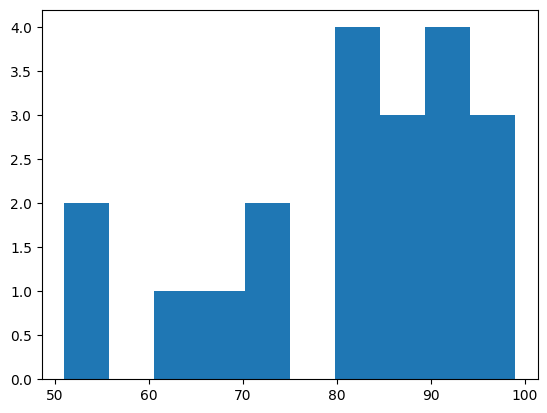

In [ ]:
plt.hist(grades_pd, bins=nbins)

(array([2., 1., 1., 2., 0., 4., 3., 1., 3., 3.]),
 array([2601., 3321., 4041., 4761., 5481., 6201., 6921., 7641., 8361.,
        9081., 9801.]),
 <BarContainer object of 10 artists>)

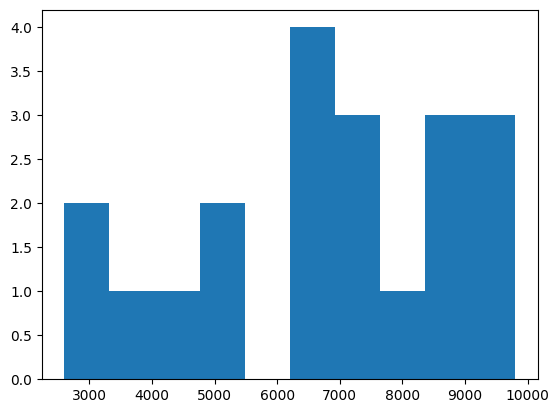

In [ ]:
plt.hist(grades_pd**2,bins=nbins)

(array([2., 1., 2., 1., 3., 1., 3., 3., 1., 3.]),
 array([132651. , 216415.8, 300180.6, 383945.4, 467710.2, 551475. ,
        635239.8, 719004.6, 802769.4, 886534.2, 970299. ]),
 <BarContainer object of 10 artists>)

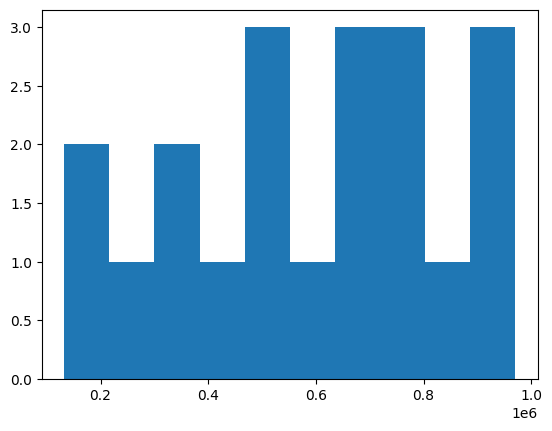

In [ ]:
plt.hist(grades_pd**3, bins=nbins)

(array([2., 0., 1., 0., 1., 2., 1., 4., 5., 4.]),
 array([3.93182563, 3.99815505, 4.06448448, 4.1308139 , 4.19714332,
        4.26347274, 4.32980216, 4.39613158, 4.46246101, 4.52879043,
        4.59511985]),
 <BarContainer object of 10 artists>)

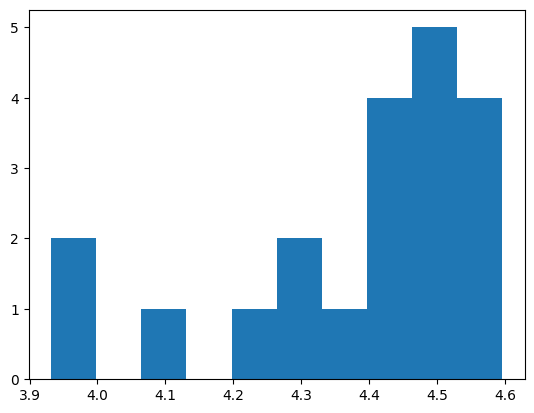

In [ ]:
plt.hist(np.log(grades_pd), bins=nbins)

(array([17.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.40934908e+22, 9.88903032e+41, 1.97780606e+42, 2.96670910e+42,
        3.95561213e+42, 4.94451516e+42, 5.93341819e+42, 6.92232122e+42,
        7.91122426e+42, 8.90012729e+42, 9.88903032e+42]),
 <BarContainer object of 10 artists>)

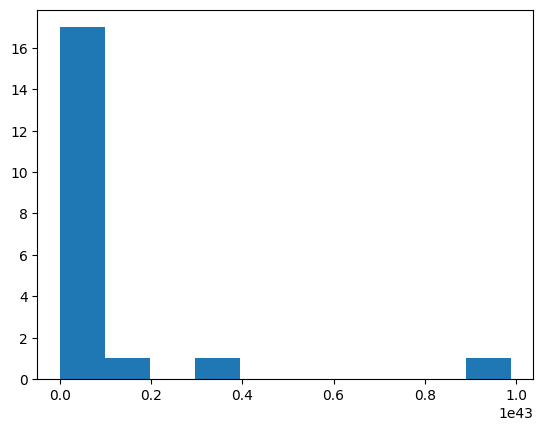

In [ ]:
plt.hist(np.exp(grades_pd), bins=nbins)